In [1]:

#Check TF version
import tensorflow as tf
print(tf.__version__)


2.3.0


In [2]:
# Is GPU enabled
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Fix it")

Default GPU Device:/device:GPU:0


In [3]:

from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, \
  Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import earthpy as et 

In [4]:
## Code needed to set a new working directory

#my_path = os.path.join(et.io.HOME, 'recommender_system')
#os.mkdir(my_path)

## Set Working Directory
os.chdir(os.path.join("/home/ckamerin/Documents/GitHub", 'recommender_system'))

In [5]:
# Check if it worked
os.getcwd()

'/home/ckamerin/Documents/GitHub/recommender_system'

In [6]:
# Data Import
df = pd.read_csv("/home/ckamerin/Desktop/headphone_df_cleaned.csv")

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop(columns='Unnamed: 0')

In [8]:
df.columns

Index(['headphone_name', 'game_use', 'travel_use', 'exercise_use',
       'office_use', 'phone_call_use', 'studio_use', 'wireless',
       'noise_cancelling', 'mic_presence', 'frequency_response_consistency',
       'bass_accuracy', 'mid_accuracy', 'treble_accuracy', 'peaks_dips',
       'imaging', 'passive_soundstage', 'weighted_harmonic_distortion',
       'noise_isolation', 'microphone_rating', 'mic_recording_quality',
       'bluetooth', 'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear',
       'head_set'],
      dtype='object')

In [9]:
X=df[['travel_use', 'exercise_use', 'office_use',
       'phone_call_use', 'studio_use', 'game_use']]
y=df[[ 'wireless', 'noise_cancelling',
       'mic_presence', 'frequency_response_consistency', 'bass_accuracy',
       'mid_accuracy', 'treble_accuracy', 'peaks_dips', 'imaging',
       'passive_soundstage', 'weighted_harmonic_distortion', 'noise_isolation',
       'microphone_rating', 'mic_recording_quality', 'bluetooth',
       'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear', 'head_set']]

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
x1_train, x1_test, y1_train, y1_test = y_train, y_test, X_train, X_test

In [12]:
# Put models in a dictionary
models = {"KNN": KNeighborsRegressor(),
          'KNN Multi' : MultiOutputRegressor(KNeighborsRegressor()),
          "Random Forest": RandomForestRegressor(),
          "Random Forest Multi": MultiOutputRegressor(RandomForestRegressor()),
          "Linear Regression": LinearRegression(),
          "Linear Regression Multi": MultiOutputRegressor(LinearRegression()),
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Decision Tree Multi': MultiOutputRegressor(DecisionTreeRegressor()),
          'Ridge Regressor Chain': RegressorChain(Ridge()),
          'Ridge Regresor Multioutput': MultiOutputRegressor(Ridge())
          }
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores



In [13]:
#Test all models on one dataset
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6089214434032404,
 'KNN Multi': 0.6089214434032404,
 'Random Forest': 0.6293297200585716,
 'Random Forest Multi': 0.592364859836228,
 'Linear Regression': 0.5186904551760366,
 'Linear Regression Multi': 0.5186904551760367,
 'Decision Tree Regression': 0.3693288209466513,
 'Decision Tree Multi': 0.3630628683084099,
 'Ridge Regressor Chain': 0.5182188732859243,
 'Ridge Regresor Multioutput': 0.5182188732859243}

In [14]:
model_scores = fit_and_score(models=models,
                             X_train=x1_train,
                             X_test=x1_test,
                             y_train=y1_train,
                             y_test=y1_test)
model_scores

{'KNN': 0.9011894872845104,
 'KNN Multi': 0.9011894872845104,
 'Random Forest': 0.8809325609291401,
 'Random Forest Multi': 0.9328052756457968,
 'Linear Regression': 0.9273341333653701,
 'Linear Regression Multi': 0.9273341333653701,
 'Decision Tree Regression': 0.7292913775028466,
 'Decision Tree Multi': 0.8741505650247628,
 'Ridge Regressor Chain': 0.9297809375844456,
 'Ridge Regresor Multioutput': 0.9297809375844456}

In [15]:
np.random.seed(42)
ANN = tf.keras.models.Sequential([
  tf.keras.layers.Dense(108, input_dim = 6, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(512, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(21, activation= 'linear')
])

In [16]:
opt = tf.keras.optimizers.Adam(.00001)
mae = tf.keras.losses.MeanAbsoluteError()
ANN.compile(optimizer=opt,metrics=['accuracy'],loss='mse')


In [17]:
hp_model=ANN.fit(x=X_train,y=y_train, validation_data = (X_test, y_test), epochs=350 ,batch_size = 16)
#hp_model=ANN.fit(x=x1_train,y=y1_train, validation_data = (x1_test, y1_test), epochs=100 ,batch_size = 16)

[==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.3087 - val_loss: 0.0468 - val_accuracy: 0.2069
Epoch 212/350
15/15 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.3217 - val_loss: 0.0468 - val_accuracy: 0.2069
Epoch 213/350
15/15 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.3261 - val_loss: 0.0468 - val_accuracy: 0.2069
Epoch 214/350
15/15 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.3261 - val_loss: 0.0467 - val_accuracy: 0.2069
Epoch 215/350
15/15 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.3174 - val_loss: 0.0466 - val_accuracy: 0.2069
Epoch 216/350
15/15 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.3174 - val_loss: 0.0465 - val_accuracy: 0.2414
Epoch 217/350
15/15 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.3130 - val_loss: 0.0463 - val_accuracy: 0.2069
Epoch 218/350
15/15

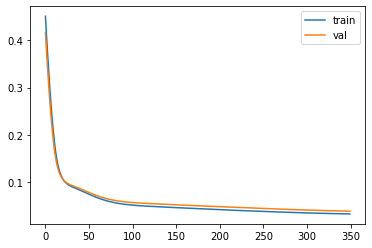

In [18]:
plt.plot(hp_model.history['loss'],label='loss')
plt.plot(hp_model.history['val_loss'],label='val_loss')
plt.legend(['train','val'])

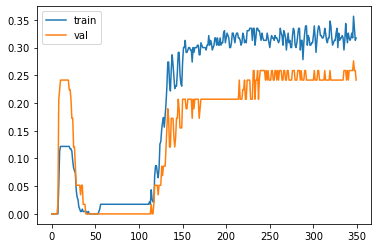

In [19]:
plt.plot(hp_model.history['accuracy'],label='accuracy')
plt.plot(hp_model.history['val_accuracy'],label='val_accuracy')
plt.legend(['train','val'])

In [20]:
userlist = np.array([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [21]:
userinputs = pd.DataFrame(data=userlist,columns = df.columns )

In [22]:
userinputs

,headphone_name,game_use,travel_use,exercise_use,office_use,phone_call_use,studio_use,wireless,noise_cancelling,mic_presence,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_pred=userinputs[['travel_use', 'exercise_use', 'office_use',
       'phone_call_use', 'studio_use',  'game_use']]

In [24]:
y_pred=ANN.predict(X_pred)

In [25]:
annpreddf = pd.DataFrame(data=y_pred, columns =y.columns)


In [26]:
annpreddf

,wireless,noise_cancelling,mic_presence,frequency_response_consistency,bass_accuracy,mid_accuracy,treble_accuracy,peaks_dips,imaging,passive_soundstage,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,0.202082,-0.066263,0.179919,0.125222,0.100442,0.110505,0.192110,0.103356,0.166410,-0.006604,...,0.067506,0.109527,0.145503,0.137837,0.127636,0.039211,0.198964,-0.006817,-0.111079,0.043249
1,0.054996,-0.020965,0.086440,0.109339,0.093311,0.153431,0.140458,0.097987,0.196154,0.094896,...,0.068430,0.039145,0.045232,0.036801,0.132205,0.070435,0.109691,0.005609,0.065065,0.030155
2,0.160977,0.006247,0.108459,0.127826,0.063190,0.114624,0.145293,0.078732,0.159652,-0.026930,...,0.130238,0.052387,0.044187,0.134013,0.118800,0.021939,0.151189,-0.022029,-0.037546,-0.008493
3,0.216502,-0.121272,0.161257,0.232544,0.127295,0.175694,0.226345,0.108203,0.236148,0.025751,...,0.086943,0.101603,0.111665,0.155544,0.178150,0.099039,0.336376,-0.038776,-0.137940,0.026508
4,0.195436,0.017321,0.140609,0.140817,0.089230,0.131331,0.123202,0.117552,0.170568,0.045935,...,0.097071,0.059153,0.055884,0.137045,0.161261,0.034578,0.172673,-0.048490,-0.083490,-0.000259
5,0.100086,-0.014135,0.028946,0.095056,0.155228,0.156778,0.196671,0.051351,0.150046,0.034927,...,0.031062,0.019676,0.009355,0.045576,0.077652,0.094742,0.169457,-0.031543,-0.040632,0.038561


In [27]:
np.random.seed(42)

KNN = KNeighborsRegressor(n_neighbors=6,weights='distance',algorithm='brute')

In [28]:
KNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=6, weights='distance')

In [29]:
KNN.score(X_test,y_test)

0.6220507667284976

In [30]:
knny_pred = KNN.predict(X_pred)

In [31]:
knnpreddf = pd.DataFrame(data=knny_pred, columns =y.columns)

In [32]:
knnpreddf

,wireless,noise_cancelling,mic_presence,frequency_response_consistency,bass_accuracy,mid_accuracy,treble_accuracy,peaks_dips,imaging,passive_soundstage,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,1.0,0.0,1.0,0.465352,0.190333,0.510046,0.573788,0.308005,0.600485,0.250630,...,0.291832,0.647728,0.670773,0.825069,0.838319,0.161681,0.662120,0.0,0.0,0.176199
1,1.0,0.0,1.0,0.463151,0.188978,0.509254,0.573782,0.306461,0.599129,0.251072,...,0.289138,0.646990,0.670435,0.825486,0.839446,0.160554,0.660978,0.0,0.0,0.178467
2,1.0,0.0,1.0,0.466598,0.190623,0.511477,0.574029,0.309598,0.603079,0.249646,...,0.294154,0.647016,0.669802,0.824355,0.839424,0.160576,0.665335,0.0,0.0,0.174089
3,1.0,0.0,1.0,0.498736,0.112388,0.490760,0.661125,0.336564,0.651810,0.252360,...,0.289653,0.650652,0.679069,0.824936,0.839090,0.160910,0.663091,0.0,0.0,0.175999
4,1.0,0.0,1.0,0.466173,0.190547,0.511115,0.574057,0.309238,0.602625,0.250005,...,0.293727,0.647146,0.669917,0.824524,0.838662,0.161338,0.664514,0.0,0.0,0.174148
5,1.0,0.0,1.0,0.561034,0.203641,0.590669,0.596079,0.413195,0.701208,0.202169,...,0.305966,0.650786,0.677410,0.793316,1.000000,0.000000,0.826285,0.0,0.0,0.173715


In [33]:
np.random.seed(42)

RF = RandomForestRegressor()

In [34]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
RF.score(X_test,y_test)

0.6293297200585716

In [36]:
rf_pred = RF.predict(X_pred)

In [37]:
rfpreddf = pd.DataFrame(data=rf_pred, columns =y.columns)

In [38]:
rfpreddf

,wireless,noise_cancelling,mic_presence,frequency_response_consistency,bass_accuracy,mid_accuracy,treble_accuracy,peaks_dips,imaging,passive_soundstage,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,0.09,0.00,0.93,0.168085,0.589770,0.660612,0.526420,0.357778,0.791368,0.565333,...,0.405213,0.862584,0.880444,0.086136,0.86,0.14,0.05,0.01,0.86,0.03
1,0.03,0.00,0.03,0.487872,0.667701,0.845918,0.711852,0.638444,0.892211,0.695444,...,0.220851,0.022360,0.023222,0.029091,0.17,0.31,0.12,0.00,0.85,0.02
2,0.06,0.03,0.06,0.471915,0.699540,0.793061,0.685802,0.601556,0.893053,0.567000,...,0.366170,0.041124,0.039667,0.050909,0.46,0.12,0.28,0.02,0.68,0.01
3,0.80,0.00,0.81,0.499574,0.177011,0.617347,0.593580,0.278000,0.344842,0.348444,...,0.077872,0.518989,0.523111,0.718636,0.84,0.08,0.25,0.00,0.14,0.59
4,0.03,0.02,0.03,0.456596,0.704253,0.824694,0.702963,0.635111,0.901684,0.592444,...,0.345638,0.018090,0.015667,0.023636,0.42,0.13,0.25,0.02,0.73,0.00
5,0.03,0.00,0.03,0.488298,0.703218,0.902449,0.747901,0.679333,0.902842,0.755111,...,0.195745,0.020899,0.021444,0.024659,0.09,0.40,0.05,0.01,0.93,0.00


In [39]:
rfdf = pd.DataFrame(columns = ['game_use', 'travel_use', 'exercise_use',
       'office_use', 'phone_call_use', 'studio_use', 'wireless',
       'noise_cancelling', 'mic_presence', 'frequency_response_consistency',
       'bass_accuracy', 'mid_accuracy', 'treble_accuracy', 'peaks_dips',
       'imaging', 'passive_soundstage', 'weighted_harmonic_distortion',
       'noise_isolation', 'microphone_rating', 'mic_recording_quality',
       'bluetooth', 'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear',
       'head_set'])

In [40]:
rfdf[['game_use', 'travel_use', 'exercise_use',
       'office_use', 'phone_call_use', 'studio_use']] = X_pred[['game_use', 'travel_use', 'exercise_use',
       'office_use', 'phone_call_use', 'studio_use']]
rfdf[['wireless',
       'noise_cancelling', 'mic_presence', 'frequency_response_consistency',
       'bass_accuracy', 'mid_accuracy', 'treble_accuracy', 'peaks_dips',
       'imaging', 'passive_soundstage', 'weighted_harmonic_distortion',
       'noise_isolation', 'microphone_rating', 'mic_recording_quality',
       'bluetooth', 'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear',
       'head_set']] = rfpreddf[['wireless',
       'noise_cancelling', 'mic_presence', 'frequency_response_consistency',
       'bass_accuracy', 'mid_accuracy', 'treble_accuracy', 'peaks_dips',
       'imaging', 'passive_soundstage', 'weighted_harmonic_distortion',
       'noise_isolation', 'microphone_rating', 'mic_recording_quality',
       'bluetooth', 'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear',
       'head_set']]

In [41]:
rfdf

,game_use,travel_use,exercise_use,office_use,phone_call_use,studio_use,wireless,noise_cancelling,mic_presence,frequency_response_consistency,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,0,0,0,0,1,0,0.09,0.00,0.93,0.168085,...,0.405213,0.862584,0.880444,0.086136,0.86,0.14,0.05,0.01,0.86,0.03
1,1,0,0,0,0,0,0.03,0.00,0.03,0.487872,...,0.220851,0.022360,0.023222,0.029091,0.17,0.31,0.12,0.00,0.85,0.02
2,0,1,0,0,0,0,0.06,0.03,0.06,0.471915,...,0.366170,0.041124,0.039667,0.050909,0.46,0.12,0.28,0.02,0.68,0.01
3,0,0,1,0,0,0,0.80,0.00,0.81,0.499574,...,0.077872,0.518989,0.523111,0.718636,0.84,0.08,0.25,0.00,0.14,0.59
4,0,0,0,1,0,0,0.03,0.02,0.03,0.456596,...,0.345638,0.018090,0.015667,0.023636,0.42,0.13,0.25,0.02,0.73,0.00
5,0,0,0,0,0,1,0.03,0.00,0.03,0.488298,...,0.195745,0.020899,0.021444,0.024659,0.09,0.40,0.05,0.01,0.93,0.00


In [42]:
randomdf = rfdf

In [43]:
np.random.seed(42)

LR = LinearRegression()

In [44]:
LR.fit(x1_train,y1_train)

LinearRegression()

In [45]:
LR.score(x1_test,y1_test)

0.9273341333653701

In [46]:
randomdf[['game_use', 'travel_use', 'exercise_use',
       'office_use', 'phone_call_use', 'studio_use']]=LR.predict(rfpreddf)

In [47]:
knnhpx=df[['travel_use', 'exercise_use', 'office_use',
       'phone_call_use', 'studio_use', 'game_use', 'wireless', 'noise_cancelling',
       'mic_presence', 'frequency_response_consistency', 'bass_accuracy',
       'mid_accuracy', 'treble_accuracy', 'peaks_dips', 'imaging',
       'passive_soundstage', 'weighted_harmonic_distortion', 'noise_isolation',
       'microphone_rating', 'mic_recording_quality', 'bluetooth',
       'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear', 'head_set']]
knnhpy=df['headphone_name']

In [48]:
len(knnhpy)

288

In [49]:
knnhp = KNeighborsRegressor(n_neighbors=288,weights='distance')

In [50]:
knnhp.fit(knnhpx,knnhpy)

KNeighborsRegressor(n_neighbors=288, weights='distance')

In [52]:
targets = knnhp.predict(randomdf).round()

In [67]:
targets

array([144., 139., 140., 146., 139., 138.])

In [77]:
df.loc[df['headphone_name'] == targets[0]]

,headphone_name,game_use,travel_use,exercise_use,office_use,phone_call_use,studio_use,wireless,noise_cancelling,mic_presence,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
115,144,5.6,0.911111,0.918919,0.771429,0.830769,0.575,1,0,1,...,0.829787,0.730337,0.766667,0.920455,1,0,1,0,0,0
